##### Cryptocurrency coinmarket-EDA 

In [71]:
""" import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join('..', 'src')))
from connect_api import get_latest_coin_data
coins_data= get_latest_coin_data(endpoint="listings")
 """

' import sys\nimport os\nsys.path.insert(0, os.path.abspath(os.path.join(\'..\', \'src\')))\nfrom connect_api import get_latest_coin_data\ncoins_data= get_latest_coin_data(endpoint="listings")\n '

In [72]:
from constants import COINMARKET_API
from requests import Session, RequestException
import json
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def get_latest_coin_data(symbol="ETH", endpoint="quotes"):

    base_url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/"

    api_endpoints = {
        "quotes": f"{base_url}quotes/latest",
        "listings": f"{base_url}listings/latest",
    }

    headers = {
        "Accepts": "application/json",
        "X-CMC_PRO_API_KEY": COINMARKET_API,
    }

    parameters = {"convert": "SEK"}

    endpoint_params = {
        "quotes": {"symbol": symbol},
        "listings": {"start": "1", "limit": "10"},
    }

    parameters.update(endpoint_params[endpoint])

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(api_endpoints[endpoint], params=parameters)
        data = json.loads(response.text)["data"]

        if symbol in data:
            coin_data = data[symbol]
            return coin_data

        elif data:
            return data

        else:
            print("No data available.")
            return None

    except RequestException as e:
        pprint.pprint(f"An error occurred: {e}")
        return None
    except KeyError as e:
        print(f"Unexpected API response structure: {e}")


In [73]:
df_quotes= pd.json_normalize(get_latest_coin_data(endpoint="quotes"))
df_quotes

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.SEK.percent_change_24h,quote.SEK.percent_change_7d,quote.SEK.percent_change_30d,quote.SEK.percent_change_60d,quote.SEK.percent_change_90d,quote.SEK.market_cap,quote.SEK.market_cap_dominance,quote.SEK.fully_diluted_market_cap,quote.SEK.tvl,quote.SEK.last_updated
0,1027,Ethereum,ETH,ethereum,9948,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",None,1.205713e+08,1.205713e+08,...,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12,None,2025-02-24T12:56:57.000Z


In [74]:

df_listings= pd.DataFrame(get_latest_coin_data(endpoint="listings"))

# df_listings = df_listings.iloc[1:]
df_listings


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote
0,1,Bitcoin,BTC,bitcoin,11958,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982844e+07,1.982844e+07,False,None,1,None,None,None,2025-02-24T12:57:00.000Z,"{'SEK': {'price': 1020778.1215234068, 'volume_..."
1,1027,Ethereum,ETH,ethereum,9948,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205713e+08,1.205713e+08,True,None,2,None,None,None,2025-02-24T12:56:00.000Z,"{'SEK': {'price': 28571.155963283305, 'volume_..."
2,52,XRP,XRP,xrp,1541,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.788781e+10,9.998642e+10,False,None,3,None,None,None,2025-02-24T12:57:00.000Z,"{'SEK': {'price': 26.432395044059835, 'volume_..."
3,825,Tether USDt,USDT,tether,117724,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.424125e+11,1.445668e+11,True,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",4,None,None,None,2025-02-24T12:56:00.000Z,"{'SEK': {'price': 10.65837098306298, 'volume_2..."
4,1839,BNB,BNB,bnb,2373,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424765e+08,1.424765e+08,False,None,5,None,None,None,2025-02-24T12:57:00.000Z,"{'SEK': {'price': 6819.828390159092, 'volume_2..."
5,5426,Solana,SOL,solana,841,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.910867e+08,5.948339e+08,True,None,6,None,None,None,2025-02-24T12:56:00.000Z,"{'SEK': {'price': 1699.4655745901625, 'volume_..."
6,3408,USDC,USDC,usd-coin,25917,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.727657e+10,5.727657e+10,False,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",7,None,None,None,2025-02-24T12:56:00.000Z,"{'SEK': {'price': 10.656816049538076, 'volume_..."
7,74,Dogecoin,DOGE,dogecoin,1169,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.481789e+11,1.481789e+11,True,None,8,None,None,None,2025-02-24T12:57:00.000Z,"{'SEK': {'price': 2.4561555294425195, 'volume_..."
8,2010,Cardano,ADA,cardano,1466,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.520758e+10,4.499505e+10,False,None,9,None,None,None,2025-02-24T12:57:00.000Z,"{'SEK': {'price': 7.820347894207421, 'volume_2..."
9,1958,TRON,TRX,tron,1123,2017-09-13T00:00:00.000Z,"[media, payments, ethereum-ecosystem, tron-eco...",NaN,8.608272e+10,8.608274e+10,True,None,10,None,None,None,2025-02-24T12:57:00.000Z,"{'SEK': {'price': 2.63946831623797, 'volume_24..."


In [75]:
# df_listings.columns
df_quotes.columns


Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active',
       'infinite_supply', 'platform', 'cmc_rank', 'is_fiat',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.SEK.price', 'quote.SEK.volume_24h',
       'quote.SEK.volume_change_24h', 'quote.SEK.percent_change_1h',
       'quote.SEK.percent_change_24h', 'quote.SEK.percent_change_7d',
       'quote.SEK.percent_change_30d', 'quote.SEK.percent_change_60d',
       'quote.SEK.percent_change_90d', 'quote.SEK.market_cap',
       'quote.SEK.market_cap_dominance', 'quote.SEK.fully_diluted_market_cap',
       'quote.SEK.tvl', 'quote.SEK.last_updated'],
      dtype='object')

In [76]:
# df_listings.describe()
df_quotes.describe()


,id,num_market_pairs,circulating_supply,total_supply,is_active,cmc_rank,is_fiat,quote.SEK.price,quote.SEK.volume_24h,quote.SEK.volume_change_24h,quote.SEK.percent_change_1h,quote.SEK.percent_change_24h,quote.SEK.percent_change_7d,quote.SEK.percent_change_30d,quote.SEK.percent_change_60d,quote.SEK.percent_change_90d,quote.SEK.market_cap,quote.SEK.market_cap_dominance,quote.SEK.fully_diluted_market_cap
count,1.0,1.0,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.000000,1.000000e+00,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000e+00,1.0000,1.000000e+00
mean,1027.0,9948.0,1.205713e+08,1.205713e+08,1.0,2.0,0.0,28571.155963,2.547308e+11,38.8842,-0.305837,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1027.0,9948.0,1.205713e+08,1.205713e+08,1.0,2.0,0.0,28571.155963,2.547308e+11,38.8842,-0.305837,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12
25%,1027.0,9948.0,1.205713e+08,1.205713e+08,1.0,2.0,0.0,28571.155963,2.547308e+11,38.8842,-0.305837,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12
50%,1027.0,9948.0,1.205713e+08,1.205713e+08,1.0,2.0,0.0,28571.155963,2.547308e+11,38.8842,-0.305837,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12
75%,1027.0,9948.0,1.205713e+08,1.205713e+08,1.0,2.0,0.0,28571.155963,2.547308e+11,38.8842,-0.305837,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12
max,1027.0,9948.0,1.205713e+08,1.205713e+08,1.0,2.0,0.0,28571.155963,2.547308e+11,38.8842,-0.305837,-3.88093,-3.19244,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12


In [77]:
df_listings.shape

(10, 18)

In [78]:
# df_listings.info()
df_quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1 non-null      int64  
 1   name                                1 non-null      object 
 2   symbol                              1 non-null      object 
 3   slug                                1 non-null      object 
 4   num_market_pairs                    1 non-null      int64  
 5   date_added                          1 non-null      object 
 6   tags                                1 non-null      object 
 7   max_supply                          0 non-null      object 
 8   circulating_supply                  1 non-null      float64
 9   total_supply                        1 non-null      float64
 10  is_active                           1 non-null      int64  
 11  infinite_supply                     1 non-null   

In [79]:
# df_listings.dtypes
df_quotes.dtypes

id                                      int64
name                                   object
symbol                                 object
slug                                   object
num_market_pairs                        int64
date_added                             object
tags                                   object
max_supply                             object
circulating_supply                    float64
total_supply                          float64
is_active                               int64
infinite_supply                          bool
platform                               object
cmc_rank                                int64
is_fiat                                 int64
self_reported_circulating_supply       object
self_reported_market_cap               object
tvl_ratio                              object
last_updated                           object
quote.SEK.price                       float64
quote.SEK.volume_24h                  float64
quote.SEK.volume_change_24h       

In [80]:
df_listings["symbol"].unique()

array(['BTC', 'ETH', 'XRP', 'USDT', 'BNB', 'SOL', 'USDC', 'DOGE', 'ADA',
       'TRX'], dtype=object)

In [81]:
df_quotes.keys()

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active',
       'infinite_supply', 'platform', 'cmc_rank', 'is_fiat',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.SEK.price', 'quote.SEK.volume_24h',
       'quote.SEK.volume_change_24h', 'quote.SEK.percent_change_1h',
       'quote.SEK.percent_change_24h', 'quote.SEK.percent_change_7d',
       'quote.SEK.percent_change_30d', 'quote.SEK.percent_change_60d',
       'quote.SEK.percent_change_90d', 'quote.SEK.market_cap',
       'quote.SEK.market_cap_dominance', 'quote.SEK.fully_diluted_market_cap',
       'quote.SEK.tvl', 'quote.SEK.last_updated'],
      dtype='object')

In [82]:
df_quote_sek = pd.json_normalize(df_listings["quote"])
df_quote_sek

,SEK.price,SEK.volume_24h,SEK.volume_change_24h,SEK.percent_change_1h,SEK.percent_change_24h,SEK.percent_change_7d,SEK.percent_change_30d,SEK.percent_change_60d,SEK.percent_change_90d,SEK.market_cap,SEK.market_cap_dominance,SEK.fully_diluted_market_cap,SEK.tvl,SEK.last_updated
0,1.020778e+06,2.608450e+11,62.7776,-0.061206,0.064278,-0.708685,-8.554022,0.315453,4.113110,2.024044e+13,61.1439,2.143634e+13,None,2025-02-24T12:56:57.000Z
1,2.857116e+04,2.547308e+11,38.8842,-0.305837,-3.880930,-3.192440,-18.859782,-20.122131,-18.908338,3.444862e+12,10.3425,3.444862e+12,None,2025-02-24T12:56:57.000Z
2,2.643240e+01,4.256194e+10,70.2893,-0.323472,-2.788810,-7.946830,-20.445784,14.347643,87.498940,1.530113e+12,4.6211,2.643240e+12,None,2025-02-24T12:56:57.000Z
3,1.065837e+01,7.334394e+11,27.2783,-0.004187,0.003985,-0.034666,0.022325,0.093834,0.021603,1.517886e+12,4.5853,1.540847e+12,None,2025-02-24T12:56:57.000Z
4,6.819828e+03,1.721967e+10,-13.1647,-0.200244,-2.389293,-5.139257,-6.541585,-6.396392,3.455414,9.716653e+11,2.9172,9.716653e+11,None,2025-02-24T12:56:57.000Z
5,1.699466e+03,3.839685e+10,133.9057,0.033338,-5.611966,-14.389927,-36.010300,-15.739958,-29.667327,8.345850e+11,2.5219,1.010900e+12,None,2025-02-24T12:56:57.000Z
6,1.065682e+01,7.576125e+10,34.6903,-0.003830,0.000633,0.002020,-0.006662,-0.032521,0.003625,6.103858e+11,1.8326,6.103858e+11,None,2025-02-24T12:56:57.000Z
7,2.456156e+00,1.397814e+10,77.3651,-0.422345,-5.456370,-13.230412,-34.215921,-27.128350,-37.735522,3.639505e+11,1.0995,3.639505e+11,None,2025-02-24T12:56:57.000Z
8,7.820348e+00,6.430961e+09,21.5646,-0.205450,-4.781943,-9.270128,-24.985415,-15.586438,-17.774736,2.753355e+11,0.8237,3.519157e+11,None,2025-02-24T12:56:57.000Z
9,2.639468e+00,6.359916e+09,38.6579,-0.211266,2.299931,0.178348,-2.900475,-1.500397,31.655899,2.272126e+11,0.6798,2.272127e+11,None,2025-02-24T12:56:57.000Z


In [83]:
#df_listings.isnull().sum()
df_quotes.isnull().sum()

id                                    0
name                                  0
symbol                                0
slug                                  0
num_market_pairs                      0
date_added                            0
tags                                  0
max_supply                            1
circulating_supply                    0
total_supply                          0
is_active                             0
infinite_supply                       0
platform                              1
cmc_rank                              0
is_fiat                               0
self_reported_circulating_supply      1
self_reported_market_cap              1
tvl_ratio                             1
last_updated                          0
quote.SEK.price                       0
quote.SEK.volume_24h                  0
quote.SEK.volume_change_24h           0
quote.SEK.percent_change_1h           0
quote.SEK.percent_change_24h          0
quote.SEK.percent_change_7d           0


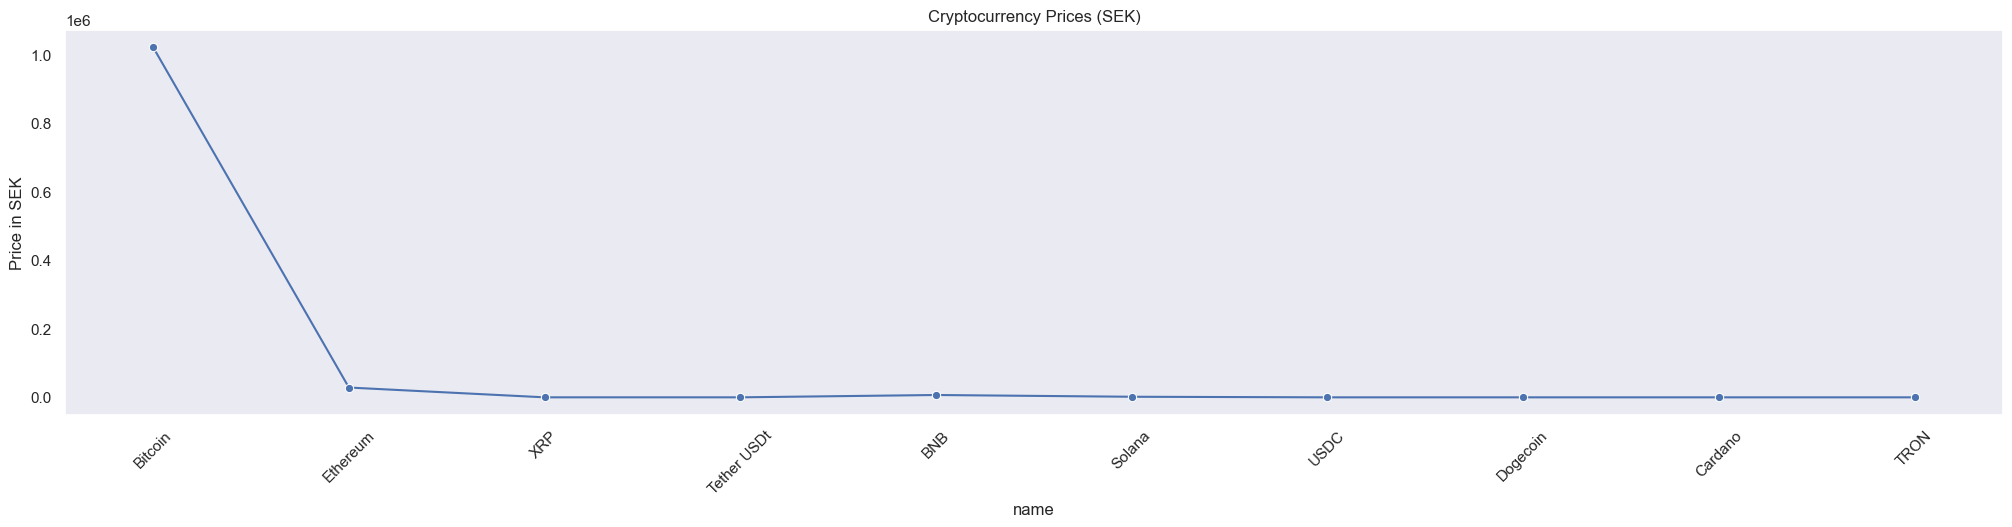

In [84]:
df_listings["price_SEK"] = df_listings["quote"].apply(lambda x: x["SEK"]["price"])

plt.figure(figsize=(25, 5))

sns.lineplot(x=df_listings["name"], y=df_listings["price_SEK"], marker="o")

plt.xticks(rotation=45)

plt.ylabel("Price in SEK")
plt.title("Cryptocurrency Prices (SEK)")

plt.show()


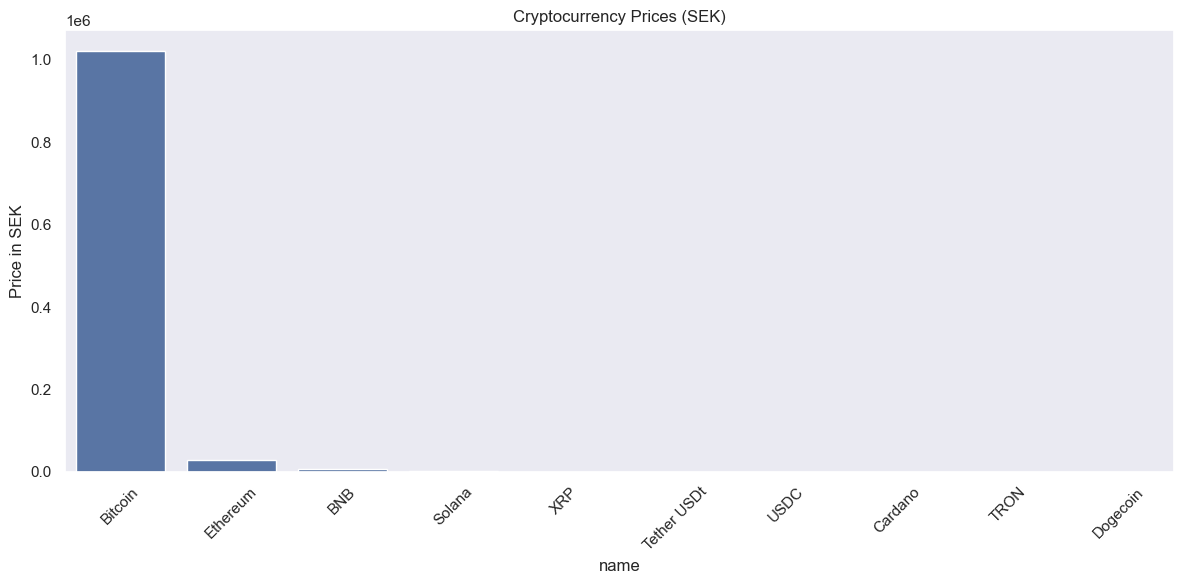

In [85]:
plt.figure(figsize=(12, 6))

sns.barplot(x='name', y='price_SEK', data=df_listings.sort_values(by='price_SEK', ascending=False))

plt.xticks(rotation=45)

plt.ylabel("Price in SEK")
plt.title("Cryptocurrency Prices (SEK)")

plt.tight_layout()

plt.show()